In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import svm
from matplotlib import pyplot
from collections import Counter
from pandas import read_csv

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from matplotlib.pyplot import *

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
dataset = read_csv("Week 1.csv", encoding="ISO-8859-1")
df=dataset[['viewed','explored','certified','grade','nevents','ndays_act','nchapters','LoE_DI','Last event date','Completed_or_not']]
df2=read_csv("Testing dataset.csv", encoding="ISO-8859-1")
df3=read_csv("Testing result.csv", encoding="ISO-8859-1")

In [3]:
df.isnull().sum()

df.head()

,viewed,explored,certified,grade,nevents,ndays_act,nchapters,LoE_DI,Last event date,Completed_or_not
0,1.0,0.0,0.0,0.0,24.0,1.0,1.0,4.0,1.363804e+09,0.0
1,1.0,0.0,0.0,0.0,7.0,2.0,1.0,3.0,1.376591e+09,0.0
2,1.0,0.0,0.0,0.0,401.0,4.0,2.0,0.0,1.366569e+09,0.0
3,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.357324e+09,0.0
4,1.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,1.374345e+09,0.0


In [4]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8]]
y=df.iloc[:,9]

Z=df2.iloc[:,[1,2,9,3,4,5,6,7,8]]
yy=df3.iloc[:,[1]]

X.shape[0]

84364

In [5]:
all_classes=['Not Completed','Completed']

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
#Trying random under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

Removed indexes: [34600 64544 21643 ... 84276 84306 84308]


In [8]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)
#print(type(id_tl))

Removed indexes: [    0     1     2 ... 84361 84362 84363]


In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [10]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [11]:
# ClusterCentroids
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     NearMiss)
sampler = ClusterCentroids()
X_rs, y_rs = sampler.fit_sample(X, y)
print('Cluster centriods undersampling {}'.format(Counter(y_rs)))

Cluster centriods undersampling Counter({0.0: 3158, 1.0: 3158})


In [12]:
yy['Completed_or_not'].value_counts()

0    57538
1     1740
Name: Completed_or_not, dtype: int64

Accuracy score:  96.41643619122875 %
RMS Error:  3.583563808771237 %
Number of mislabeled points out of a total 25310 points : 907 


Area under Curve: 0.525


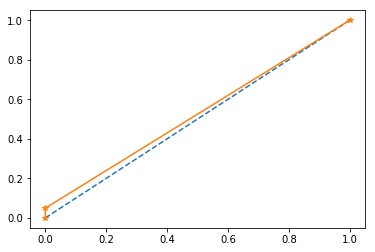

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     24356
         1.0       1.00      0.05      0.09       954

   micro avg       0.96      0.96      0.96     25310
   macro avg       0.98      0.52      0.54     25310
weighted avg       0.97      0.96      0.95     25310


Confusion matrix, without normalization
[[24356     0]
 [  907    47]]


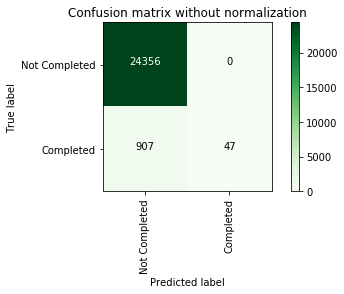

In [13]:
#Model training and validating - Accuracy and Matrix

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, shuffle=True)

#SVM with 80-20 test train split
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  
predictions=clf.predict(X_test)

print("Accuracy score: ",accuracy_score(y_test, predictions)*100,"%")
print("RMS Error: ", mean_squared_error(y_test, predictions, multioutput = 'uniform_average')*100,"%")
print("Number of mislabeled points out of a total %d points : %d \n\n" % (X_test.shape[0],(y_test != predictions).sum()))


auc = roc_auc_score(y_test, predictions)
print('Area under Curve: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='*')
# show the plot
pyplot.show()

print(classification_report(y_test,predictions))

cnf_matrix=confusion_matrix(y_test,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')

Accuracy score:  97.23168797867675 %
RMS Error:  2.7683120213232564 %
Area under Curve: 0.530


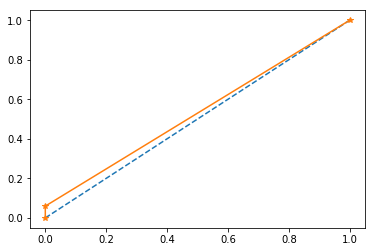

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     57538
           1       0.95      0.06      0.11      1740

   micro avg       0.97      0.97      0.97     59278
   macro avg       0.96      0.53      0.55     59278
weighted avg       0.97      0.97      0.96     59278

Recall score:  0.059770114942528735
Precision score:  0.9718155134514619

Confusion matrix, without normalization
[[57533     5]
 [ 1636   104]]


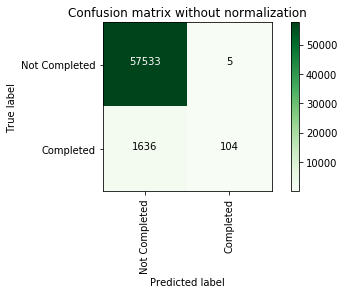

In [14]:
#Predictions on different test dataset

predictions=clf.predict(Z)

print("Accuracy score: ",accuracy_score(yy, predictions)*100,"%")
print("RMS Error: ", mean_squared_error(yy, predictions, multioutput = 'uniform_average')*100,"%")

auc = roc_auc_score(yy, predictions)
print('Area under Curve: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(yy, predictions)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr,tpr, marker='*')
# show the plot
pyplot.show()

print(classification_report(yy,predictions))
print("Recall score: ", recall_score(yy,predictions))
print("Precision score: ", precision_score(yy,predictions,average='weighted'))

cnf_matrix=confusion_matrix(yy,predictions)
plot_confusion_matrix(cnf_matrix,classes=all_classes, title='Confusion matrix without normalization')